In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
sys.path.append('..')
import afml.sampling as sampling

In [4]:
raw_data = pd.read_csv('../data/ESU13.csv')
data_indexed = raw_data.copy()
data_indexed['time'] = pd.to_datetime(data_indexed['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [5]:
def plot_thresholds(ties):
    statistics = pd.DataFrame({'value': ties.statistics, 'time': data_indexed.loc[ties.statistics.index, 'time']})
    thresholds = pd.DataFrame({'value': ties.thresholds, 'time': data_indexed.loc[ties.thresholds.index, 'time']})

    plt.figure(figsize=(15, 5))
    plt.plot(statistics['time'], statistics['value'])
    plt.step(thresholds['time'], thresholds['value'], where='pre')
    plt.show()

## Tick runs bars

In [6]:
imbalance = sampling.tick_rule(data_indexed['price'])
ties = sampling.TickRunsEvents(imbalance, 100000, imbalance.mean().item(), 2*1e-5)

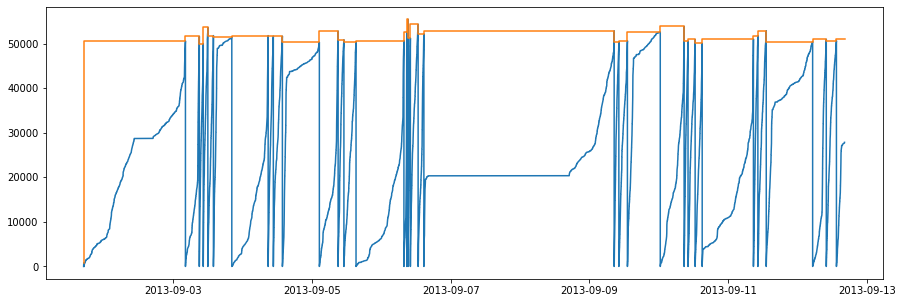

In [7]:
plot_thresholds(ties)

In [8]:
data_tick_vwap = sampling.bars_sampling(data_indexed, ties.events)

In [9]:
data_tick_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-01 17:07:20.797,1640.25,1641.00,1639.00,1640.50,6701,1640.057566,440.714,1702
1,2013-09-03 04:13:36.540,1640.50,1649.00,1639.50,1643.25,323137,1645.453830,126367.445,100878
2,2013-09-03 09:01:45.959,1643.25,1650.00,1642.25,1644.75,374143,1647.048644,17289.419,101457
3,2013-09-03 10:23:24.560,1644.75,1648.75,1641.25,1641.25,360099,1645.572387,4898.601,97058
4,2013-09-03 11:58:46.321,1641.25,1641.50,1633.50,1633.75,428167,1637.895747,5721.761,103098
5,2013-09-03 13:54:19.940,1633.50,1635.50,1630.75,1633.75,364013,1633.412567,6933.592,99126
6,2013-09-03 20:15:52.992,1633.75,1640.00,1633.25,1638.00,449197,1637.216005,22893.052,97063
7,2013-09-04 08:50:43.786,1638.00,1642.75,1635.00,1642.50,335338,1638.408240,45288.894,103403
8,2013-09-04 10:38:02.059,1642.50,1650.00,1642.00,1649.25,436261,1646.610009,6438.273,100970
9,2013-09-04 13:45:59.118,1649.25,1654.75,1649.25,1652.00,461472,1652.378070,11277.059,102363


## Volume runs bars

In [10]:
volume = data_indexed['volume']
volume_imbalance = imbalance*data_indexed['volume']
volume_up = np.mean([v for v in volume_imbalance if v > 0])
volume_down = -np.mean([v for v in volume_imbalance if v < 0])
ties = sampling.DollarVolumeRunsEvents(imbalance, volume, 100000, imbalance.mean().item(), volume_up, volume_down, 2*1e-5)

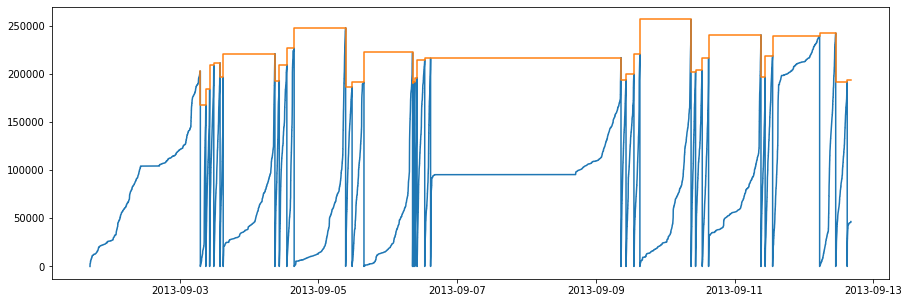

In [11]:
plot_thresholds(ties)

In [12]:
data_volume_vwap = sampling.bars_sampling(data_indexed, ties.events)

In [13]:
data_volume_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-03 07:10:47.203,1640.25,1649.00,1639.00,1644.00,397303,1645.233331,137447.120,126724
1,2013-09-03 09:03:53.455,1644.00,1650.00,1643.50,1646.75,323702,1647.450349,6786.252,82209
2,2013-09-03 10:23:40.315,1646.75,1648.75,1640.25,1640.50,350390,1645.486837,4786.860,93764
3,2013-09-03 11:49:25.625,1640.50,1641.50,1633.75,1634.50,397967,1638.022559,5145.237,95823
4,2013-09-03 14:00:00.992,1634.25,1635.50,1630.75,1634.75,407493,1633.524729,7833.916,109999
5,2013-09-03 15:05:09.034,1635.00,1639.50,1634.25,1637.75,369411,1637.222423,3907.991,80520
6,2013-09-04 08:58:44.227,1637.75,1643.75,1635.00,1642.50,436201,1638.818233,64415.193,125606
7,2013-09-04 10:29:09.188,1642.50,1649.75,1642.25,1648.75,366027,1646.818442,5424.961,83798
8,2013-09-04 13:06:10.171,1648.75,1654.75,1648.50,1652.50,418283,1652.277610,9420.983,90839
9,2013-09-04 15:37:48.348,1652.50,1654.50,1649.50,1654.25,424793,1651.774324,9098.177,96953


## Dollar-volume imbalance bars

In [14]:
volume = data_indexed['volume']*data_indexed['price']
volume_imbalance = imbalance*volume
volume_up = np.mean([v for v in volume_imbalance if v > 0])
volume_down = -np.mean([v for v in volume_imbalance if v < 0])
ties = sampling.DollarVolumeRunsEvents(imbalance, volume, 100000, imbalance.mean().item(), volume_up, volume_down, 2*1e-5)

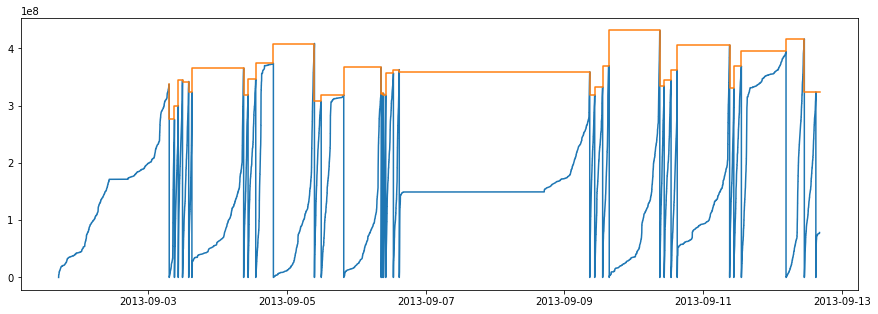

In [15]:
plot_thresholds(ties)

In [16]:
data_dollar_volume_vwap = sampling.bars_sampling(data_indexed, ties.events)
data_dollar_volume_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-03 07:16:05.137,1640.25,1649.00,1639.00,1644.75,400571,1645.224622,137765.054,127605
1,2013-09-03 09:04:40.574,1644.75,1650.00,1643.75,1646.50,324701,1647.471273,6515.437,82723
2,2013-09-03 10:23:45.054,1646.50,1648.75,1640.25,1640.50,347342,1645.456581,4744.480,92709
3,2013-09-03 11:51:56.182,1640.50,1641.50,1633.75,1634.75,403773,1637.957883,5291.123,97459
4,2013-09-03 14:00:14.079,1634.75,1635.50,1630.75,1635.00,403686,1633.514932,7697.897,108696
5,2013-09-03 15:06:49.761,1635.00,1639.50,1634.25,1638.25,371850,1637.253421,3995.682,80575
6,2013-09-04 09:01:00.516,1638.25,1644.25,1635.00,1644.00,441791,1638.941453,64450.755,128199
7,2013-09-04 10:33:01.253,1644.00,1649.75,1643.75,1649.50,369514,1647.024119,5520.737,83740
8,2013-09-04 13:11:50.308,1649.50,1654.75,1648.75,1651.75,418211,1652.362661,9529.055,90934
9,2013-09-04 19:18:13.813,1651.75,1655.25,1649.50,1654.25,423585,1651.866892,21983.194,96968


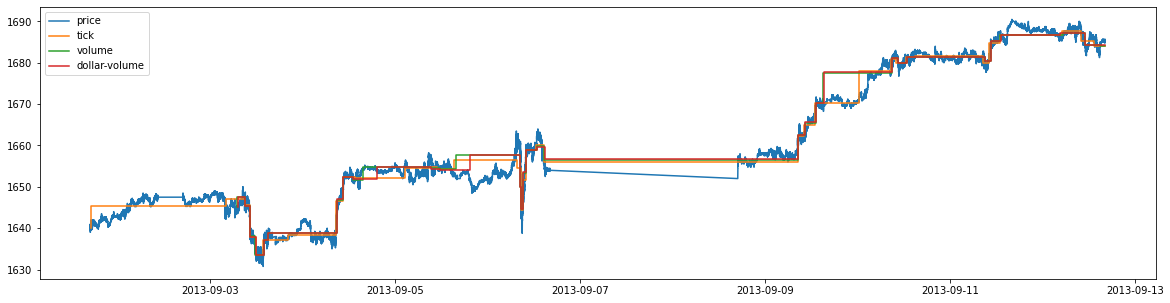

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(data_indexed.time, data_indexed.price, label='price')
plt.step(data_tick_vwap['time'], data_tick_vwap['vwap'], where='pre', label='tick')
plt.step(data_volume_vwap['time'], data_volume_vwap['vwap'], where='pre', label='volume')
plt.step(data_dollar_volume_vwap['time'], data_dollar_volume_vwap['vwap'], where='pre', label='dollar-volume')
plt.legend()
plt.show()